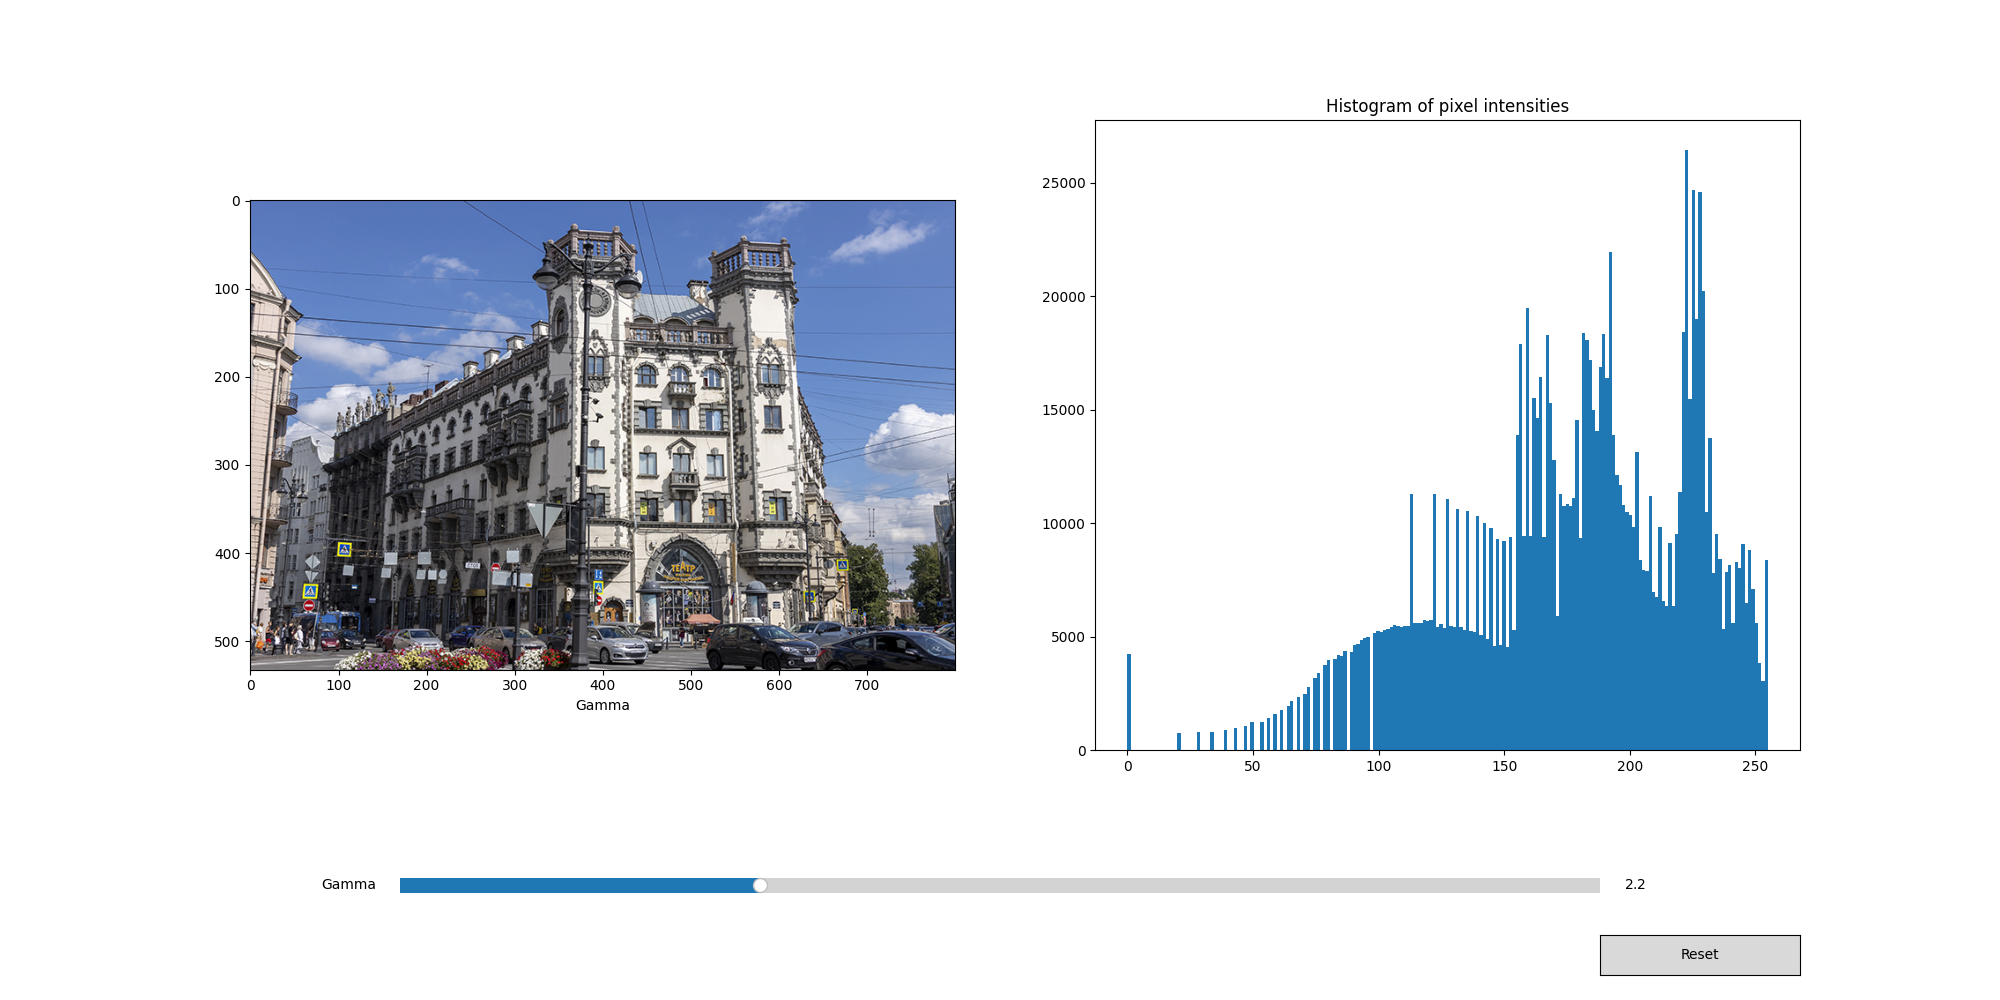

In [2]:
%matplotlib widget
from ipywidgets import *
import colour as cs
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

def apply_degamma(input_image: np.ndarray, gamma: float) -> np.ndarray:
    return np.float_power(input_image / 255, 1 / gamma) * 255

def apply_gamma(input_image: np.ndarray, gamma: float) -> np.ndarray:
    # return (cs.gamma_function(input_image / 255, gamma, 'Clamp') * 255).astype(np.uint8)
    return (np.float_power(input_image / 255, gamma) * 255).astype(np.uint8)

# Define initial parameters
init_gamma = 2.2

image = cv.imread(os.getcwd() + "/data/IMG_1836_800.png")
image.shape
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_dg = apply_degamma(image, 2.2)

image_dg_curr = image_dg

# Create the figure and the line that we will manipulate
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(apply_gamma(image_dg, 2.2))
axs[0].set_xlabel('Gamma')
axs[1].hist(image_dg_curr.flatten(), bins='auto')
axs[1].set_title('Histogram of pixel intensities')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)

# Make a horizontal slider to control the frequency.
axgamma = fig.add_axes([0.20, 0.1, 0.60, 0.03])
gamma_slider = Slider(
    ax=axgamma,
    label='Gamma',
    valmin=1.0,
    valmax=5.0,
    valinit=init_gamma,
)


# The function to be called anytime a slider's value changes
def update(val):
    image_dg_curr = apply_gamma(image_dg, gamma_slider.val)
    axs[0].imshow(image_dg_curr)
    axs[1].clear()
    axs[1].hist(image_dg_curr.flatten(), bins='auto')
    fig.canvas.draw_idle()


# register the update function with each slider
gamma_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    gamma_slider.reset()
button.on_clicked(reset)

plt.show()
